## Introduction 

Our aim is to identify high-risk demographics by analyzing accident claims data to determine the age groups most likely to file claims.
Furthermore, we look for the city with the highest rate of accidents. We want to use these insights to create dashboards that will improve strategic decision-making and visualization.

## Table of Contents

1. Importing Packages</a>

2. Loading Data</a>

3. Exploratory Data Analysis (EDA)</a>

4. Data Engineering</a>

5. Modeling</a>

6. Model Performance</a>

7. Model Explanations</a>

### 1. Import Pacakages

We will be importing the necesarry libraries for analysis


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### 2. Loading Data


In [2]:
df = pd.read_csv("Advanced Features Claims Data.csv")

### 3. Exploratory Data Analysis (EDA)

In EDA we trying to get insight of our data and analyze it



In [3]:
#Checking the first five columns
df.head()

Unnamed: 0  months_as_customer  age  policy_number policy_bind_date  \
0           0                 328   48         521585       2014-10-17   
1           1                 228   42         342868       2006-06-27   
2           2                 134   29         687698       2000-09-06   
3           3                 256   41         227811       1990-05-25   
4           4                 228   44         367455       2014-06-06   

  policy_state policy_csl  policy_deductable  policy_annual_premium  \
0           OH    250/500               1000                1406.91   
1           IN    250/500               2000                1197.22   
2           OH    100/300               2000                1413.14   
3           IL    250/500               2000                1415.74   
4           IL   500/1000               1000                1583.91   

   umbrella_limit  ...  vehicle_claim  auto_make auto_model auto_year  \
0               0  ...          52080       Saab        92x      2004   
1         5000000  ...           3510   Mercedes       E400      2007   
2         5000000  ...          23100      Dodge        RAM      2007   
3         6000000  ...          50720  Chevrolet      Tahoe      2014   
4         6000000  ...           4550     Accura        RSX      2009   

  fraud_reported ages_category   customer_category  Contract Years  \
0              Y   Middle Aged    Long-Term Client       27.333333   
1              Y   Middle Aged    Long-Term Client       19.000000   
2              N   Young Adult  Established Client       11.166667   
3              Y   Middle Aged    Long-Term Client       21.333333   
4              N   Middle Aged    Long-Term Client       19.000000   

  total_premiums_paid net_value_of_customer  
0               38455                -33155  
1               22747                 17677  
2               15780                -18870  
3               30202                -33198  
4               30094                 23594  

[5 rows x 45 columns]

In [4]:
df.shape

(1000, 45)

Our dataset has 1000 rows and 45 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          1000 non-null   int64  
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   object 
 5   policy_state                 1000 non-null   object 
 6   policy_csl                   1000 non-null   object 
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               1000 non-null   int64  
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   object 
 12  insured_education_level      1000 non-null   object 
 13  insured_occupation 

**Obervations**

1. We have 22 numetrical features 
2. We have 23 categorial features

In [6]:
#Check for duplicates
df.duplicated().sum()

0

**Obervations**


Our dataset contains no duplicated values, as indicated by the count of 0.

In [7]:
df.isnull().sum()

Unnamed: 0                      0
months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injurie

**Obervations**


The authorities_contacted column in our dataset has 91 null values, while the customer_category column has 1 null value.


In [8]:
#Check for statistical features. T(Transpose) swaps the row the rows to columns for more readablity
df.describe().T

count          mean           std         min  \
Unnamed: 0                   1000.0  4.995000e+02  2.888194e+02        0.00   
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
Contract Years               1000.0  1.699617e+01  9.592765e+00        0.00   
total_premiums_paid          1000.0  2.136535e+04  1.280913e+04        0.00   
net_value_of_customer        1000.0 -3.139658e+04  2.860910e+04   -98697.00   

                                       25%         50%            75%  \
Unnamed: 0                      249.750000     499.500     749.250000   
months_as_customer              115.750000     199.500     276.250000   
age                              32.000000      38.000      44.000000   
policy_number                335980.250000  533135.000  759099.750000   
policy_deductable               500.000000    1000.000    2000.000000   
policy_annual_premium          1089.607500    1257.200    1415.695000   
umbrella_limit                    0.000000       0.000       0.000000   
insured_zip                  448404.500000  466445.500  603251.000000   
capital-gains                     0.000000       0.000   51025.000000   
capital-loss                 -51500.000000  -23250.000       0.000000   
incident_hour_of_the_day          6.000000      12.000      17.000000   
number_of_vehicles_involved       1.000000       1.000       3.000000   
bodily_injuries                   0.000000       1.000       2.000000   
witnesses                         1.000000       1.000       2.000000   
total_claim_amount            41812.500000   58055.000   70592.500000   
injury_claim                   4295.000000    6775.000   11305.000000   
property_claim                 4445.000000    6750.000   10885.000000   
vehicle_claim                 30292.500000   42100.000   50822.500000   
auto_year                      2000.000000    2005.000    2010.000000   
Contract Years                    9.645833      16.625      23.020833   
total_premiums_paid           11398.250000   20376.500   29419.750000   
net_value_of_customer        -52518.750000  -35354.000  -14472.250000   

                                      max  
Unnamed: 0                   9.990000e+02  
months_as_customer           4.790000e+02  
age                          6.400000e+01  
policy_number                9.994350e+05  
policy_deductable            2.000000e+03  
policy_annual_premium        2.047590e+03  
umbrella_limit               1.000000e+07  
insured_zip                  6.209620e+05  
capital-gains                1.005000e+05  
capital-loss                 0.000000e+00  
incident_hour_of_the_day     2.300000e+01  
numb

In [9]:
df.select_dtypes(include='number')


Unnamed: 0  months_as_customer  age  policy_number  policy_deductable  \
0             0                 328   48         521585               1000   
1             1                 228   42         342868               2000   
2             2                 134   29         687698               2000   
3             3                 256   41         227811               2000   
4             4                 228   44         367455               1000   
..          ...                 ...  ...            ...                ...   
995         995                   3   38         941851               1000   
996         996                 285   41         186934               1000   
997         997                 130   34         918516                500   
998         998                 458   62         533940               2000   
999         999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  ...  bodily_injuries  witnesses  total_claim_amount  \
0               0  ...                1          2               71610   
1               0  ...                0          0                5070   
2               0  ...                2          3               34650   
3          -62400  ...                1          2               63400   
4          -46000  ...                0          1                6500   
..            ...  ...              ...        ...                 ...   
995             0  ...                0          1               87200   
996             0  ...                2          3              108480   
997             0  ...                2          3               67500   
998             0  ...                0          1               46980   
999             0  ...                0          3                5060   

     injury_claim  property_claim  vehicle_claim  auto_year  Contract Years  \
0            6510           13020          52080       2004       27.333333   
1             780             780           3510       2007       19.000000   
2            7700            3850          23100       2007       11.166667   
3            6340            6340          50720       2014       21.333333   
4            1300             650           4550       2009       19.000000   
..            ...             ...            ...        ...             ...   
995         17440            8720          61040       2006        0.250000   
996         18080           18080          72320       2015       23.750000   
997          7500            7500          52500       1996       10.833333   
998          5220            5220          36540       1998       38.166667   
999           460             920           3680       2007       38.000000   

     total_premiums_paid  net_value_of_customer  
0                  38455                 -33155  
1                  22747                  17677  
2                  15780                 -18870  
3                  30202                 -33198  
4                  30094                  23594  
..                   ...                 

In [10]:
df.select_dtypes(include='float')

policy_annual_premium  Contract Years
0                  1406.91       27.333333
1                  1197.22       19.000000
2                  1413.14       11.166667
3                  1415.74       21.333333
4                  1583.91       19.000000
..                     ...             ...
995                1310.80        0.250000
996                1436.79       23.750000
997                1383.49       10.833333
998                1356.92       38.166667
999                 766.19       38.000000

[1000 rows x 2 columns]

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = df.select_dtypes(include=numerics)

In [12]:
#Check the skewnes of all the Columns in our dataSet

numerical_features.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
capital-loss                  -0.391472
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
Unnamed: 0                     0.000000
policy_annual_premium          0.004402
bodily_injuries                0.014777
witnesses                      0.019636
policy_number                  0.038991
injury_claim                   0.264811
months_as_customer             0.362177
Contract Years                 0.362177
property_claim                 0.378169
net_value_of_customer          0.430396
policy_deductable              0.477887
capital-gains                  0.478850
age                            0.478988
number_of_vehicles_involved    0.502664
total_premiums_paid            0.544505
insured_zip                    0.816554
umbrella_limit                 1.806712
dtype: float64

**Note**

Examining the skewness of features allows us to detect outliers. Outliers are extreme values within our dataset. In our dataset, we encounter both positive and negative values, as well as values close to zero. If a value falls between -0.5 and 0.5, the distribution is considered symmetric. However, if the skewness is less than -1, the distribution is left-skewed and if it is greater than 1 the distribution is right-skewed

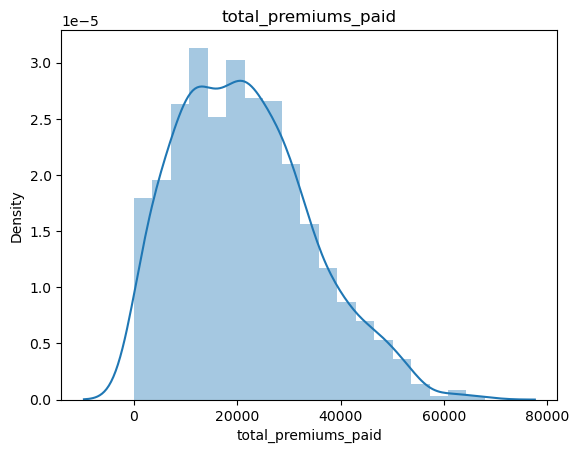

In [13]:
# plot relevant feature interactions          
sns.distplot(df['total_premiums_paid'])
plt.title('total_premiums_paid')
plt.show()

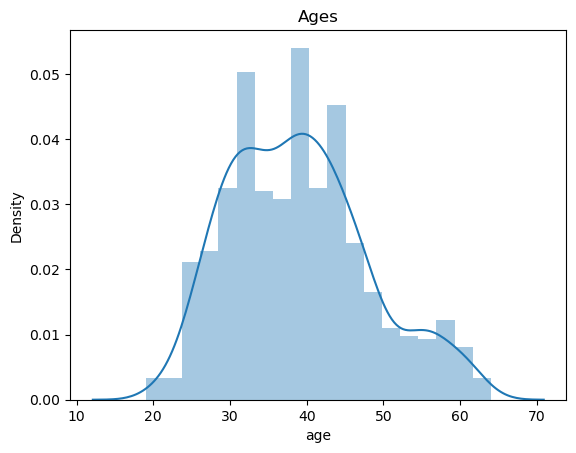

In [14]:

#Age Distribution Analysis
sns.distplot(df['age'])
plt.title('Ages')
plt.show()

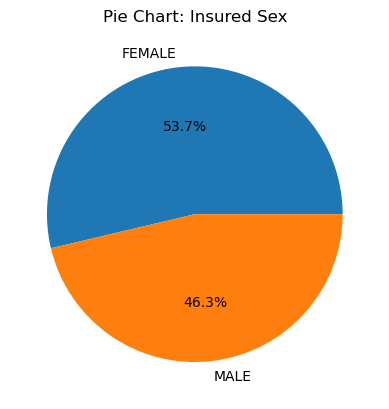

In [15]:
sex_counts = df["insured_sex"].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart: Insured Sex")
plt.show()

<Axes: ylabel='Frequency'>

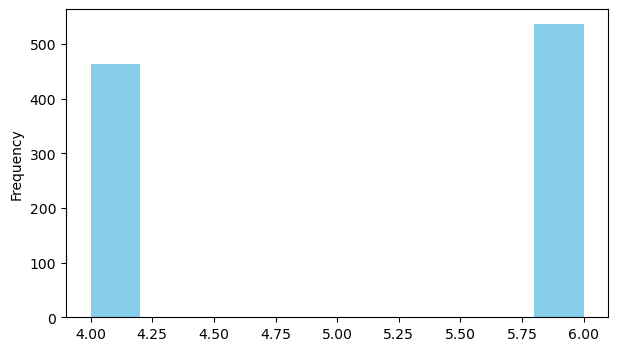

In [16]:
df['insured_sex'].str.len().plot.hist(color = 'skyblue', figsize = (7, 4))


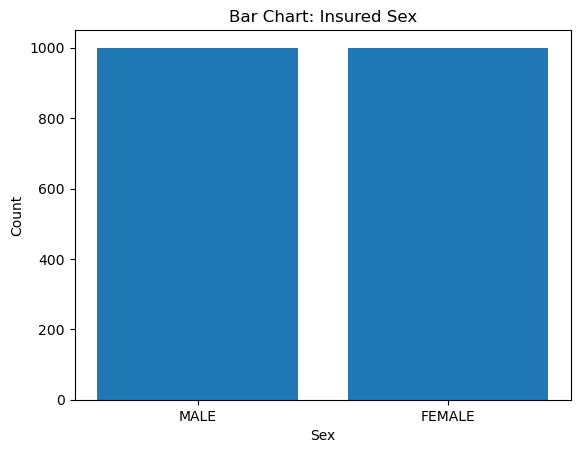

In [17]:
plt.bar(df['insured_sex'], df['insured_sex'].count())
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Bar Chart: Insured Sex")
plt.show()

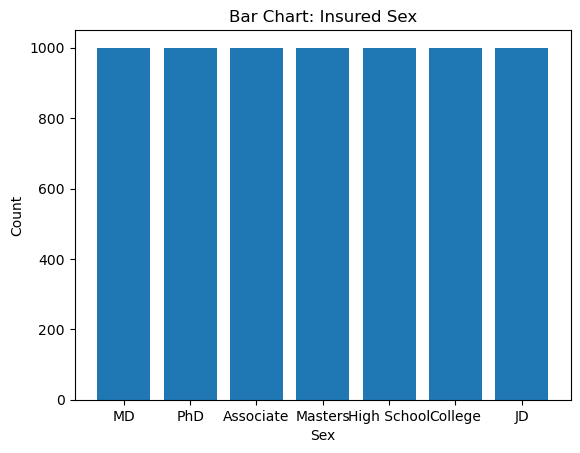

In [18]:
plt.bar(df['insured_education_level'], df['insured_education_level'].count())
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Bar Chart: Insured Sex")
plt.show()

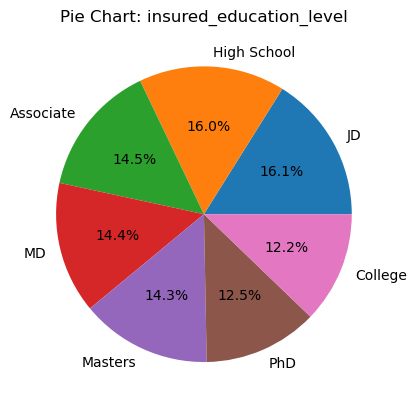

In [19]:
education_counts = df["insured_education_level"].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart: insured_education_level")
plt.show()

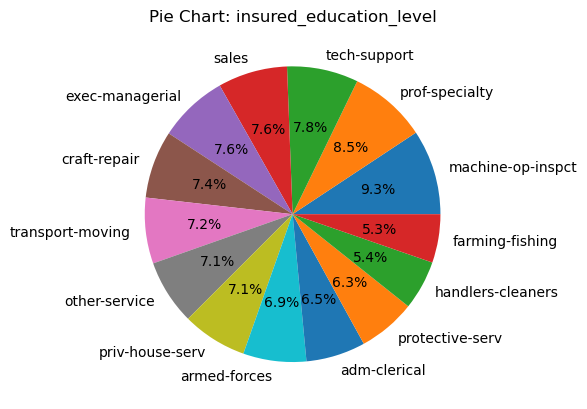

In [20]:
occupation_counts = df["insured_occupation"].value_counts()
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart: insured_education_level")
plt.show()

# TO - DO
 
 1. **Age Distribution Analysis**:
   - Start by analyzing the distribution of ages among claimants. Plot a histogram or kernel density estimation (KDE) plot to visualize the age distribution.
   - Identify the age groups with the highest frequency of claims. You can segment the data into age bins (e.g., 18-25, 26-35, etc.) to better understand the patterns.
   - Compare the frequency and severity of claims across different age groups to determine which age groups are most prone to making claims.

2. **Demographic Feature Analysis**:
   - Explore other demographic features such as insured sex, education level, occupation, hobbies, and relationship status.
   - Visualize the distribution of claims within each demographic category. For example, create bar plots or pie charts to show the proportion of claims for different education levels or occupations.
   - Conduct statistical tests or calculate correlation coefficients to assess the relationship between demographic features and claim frequency or severity.

3. **Age-Related Risk Factors**:
   - Investigate potential risk factors associated with different age groups. For example, younger drivers may have less driving experience and be more prone to accidents due to risky driving behaviors.
   - Consider external factors such as societal trends or regulatory changes that may impact driving habits and accident rates among certain age groups.

4. **Insights and Recommendations**:
   - Based on the analysis, generate insights into the high-risk demographics most prone to making claims.
   - Provide recommendations for targeted interventions or policy changes aimed at reducing accidents and mitigating risks for specific demographic groups.


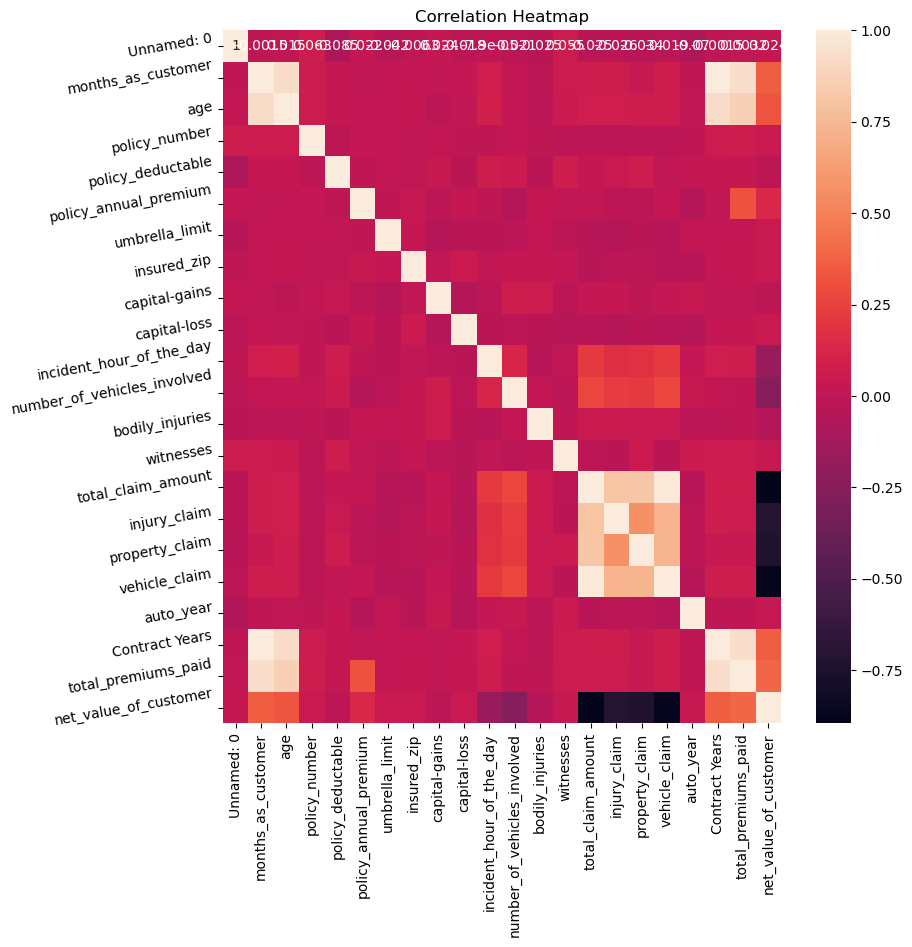

In [21]:
plt.figure(figsize=(9,9))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(numerical_features.corr(), annot=True, linecolor='white')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=10)           
plt.show()

**Observation**
         
The color scale on the right-hand side of the visualization indicates the degree of correlation between the features. Lighter colors represent stronger correlations. In This case, there are some features highlighted in white, which indicates highly correlated features. This occurs when the features are essentially identical

### 4. Data Engineering 

In this section we are required to clean the dataset and possibly create new features - as identified in the EDA phase.



In [22]:
#Make a copy of df
df_new = df.copy()

In [23]:
#Convert policy_bind_date to year,month and day
df_new['policy_bind_date'] = pd.to_datetime(df_new['policy_bind_date'])
df_new['Year'] = df_new['policy_bind_date'].dt.year
df_new['Month'] = df_new['policy_bind_date'].dt.month
df_new['Day'] = df_new['policy_bind_date'].dt.day

In [24]:
df_new.head()

Unnamed: 0  months_as_customer  age  policy_number policy_bind_date  \
0           0                 328   48         521585       2014-10-17   
1           1                 228   42         342868       2006-06-27   
2           2                 134   29         687698       2000-09-06   
3           3                 256   41         227811       1990-05-25   
4           4                 228   44         367455       2014-06-06   

  policy_state policy_csl  policy_deductable  policy_annual_premium  \
0           OH    250/500               1000                1406.91   
1           IN    250/500               2000                1197.22   
2           OH    100/300               2000                1413.14   
3           IL    250/500               2000                1415.74   
4           IL   500/1000               1000                1583.91   

   umbrella_limit  ...  auto_year fraud_reported ages_category  \
0               0  ...       2004              Y   Middle Aged   
1         5000000  ...       2007              Y   Middle Aged   
2         5000000  ...       2007              N   Young Adult   
3         6000000  ...       2014              Y   Middle Aged   
4         6000000  ...       2009              N   Middle Aged   

    customer_category Contract Years total_premiums_paid  \
0    Long-Term Client      27.333333               38455   
1    Long-Term Client      19.000000               22747   
2  Established Client      11.166667               15780   
3    Long-Term Client      21.333333               30202   
4    Long-Term Client      19.000000               30094   

   net_value_of_customer  Year Month Day  
0                 -33155  2014    10  17  
1                  17677  2006     6  27  
2                 -18870  2000     9   6  
3                 -33198  1990     5  25  
4                  23594  2014     6   6  

[5 rows x 48 columns]

In [25]:
#Check Columns in the dataframe
df_new.columns

Index(['Unnamed: 0', 'months_as_customer', 'age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'ages_category',
       'customer_category', 'Contract Years', 'total_premiums_paid',
       'net_value_of_customer', 'Year', 'Month', 'Day'],
      dtype='object')

X=['insured_sex','insured_education_level', 'insured_occupation','incident_date', 'incident_type', 'collision_type', 'incident_severity',
   'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved','injury_claim','vehicle_claim', 'auto_make',
       'auto_model', 'auto_year','ages_category', 'total_premiums_paid','total_claim_amount', 'Year', 'Month', 'Day']

In [26]:
df_new = df_new.drop(columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss','property_damage', 
       'witnesses', 'police_report_available',
       'injury_claim', 'vehicle_claim', 'fraud_reported','net_value_of_customer','Unnamed: 0','collision_type','authorities_contacted','customer_category'])

In [27]:
df_new.head()

insured_sex insured_education_level insured_occupation incident_date  \
0        MALE                      MD       craft-repair    2015-01-25   
1        MALE                      MD  machine-op-inspct    2015-01-21   
2      FEMALE                     PhD              sales    2015-02-22   
3      FEMALE                     PhD       armed-forces    2015-01-10   
4        MALE               Associate              sales    2015-02-17   

              incident_type incident_severity incident_state incident_city  \
0  Single Vehicle Collision      Major Damage             SC      Columbus   
1             Vehicle Theft      Minor Damage             VA     Riverwood   
2   Multi-vehicle Collision      Minor Damage             NY      Columbus   
3  Single Vehicle Collision      Major Damage             OH     Arlington   
4             Vehicle Theft      Minor Damage             NY     Arlington   

   incident_location  incident_hour_of_the_day  ...  property_claim  \
0     9935 4th Drive                         5  ...           13020   
1       6608 MLK Hwy                         8  ...             780   
2  7121 Francis Lane                         7  ...            3850   
3   6956 Maple Drive                         5  ...            6340   
4       3041 3rd Ave                        20  ...             650   

   auto_make  auto_model  auto_year ages_category Contract Years  \
0       Saab         92x       2004   Middle Aged      27.333333   
1   Mercedes        E400       2007   Middle Aged      19.000000   
2      Dodge         RAM       2007   Young Adult      11.166667   
3  Chevrolet       Tahoe       2014   Middle Aged      21.333333   
4     Accura         RSX       2009   Middle Aged      19.000000   

   total_premiums_paid  Year  Month  Day  
0                38455  2014     10   17  
1                22747  2006      6   27  
2                15780  2000      9    6  
3                30202  1990      5   25  
4                30094  2014      6    6  

[5 rows x 23 columns]

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   insured_sex                  1000 non-null   object 
 1   insured_education_level      1000 non-null   object 
 2   insured_occupation           1000 non-null   object 
 3   incident_date                1000 non-null   object 
 4   incident_type                1000 non-null   object 
 5   incident_severity            1000 non-null   object 
 6   incident_state               1000 non-null   object 
 7   incident_city                1000 non-null   object 
 8   incident_location            1000 non-null   object 
 9   incident_hour_of_the_day     1000 non-null   int64  
 10  number_of_vehicles_involved  1000 non-null   int64  
 11  bodily_injuries              1000 non-null   int64  
 12  total_claim_amount           1000 non-null   int64  
 13  property_claim     

In [29]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_new.apply(LabelEncoder().fit_transform)

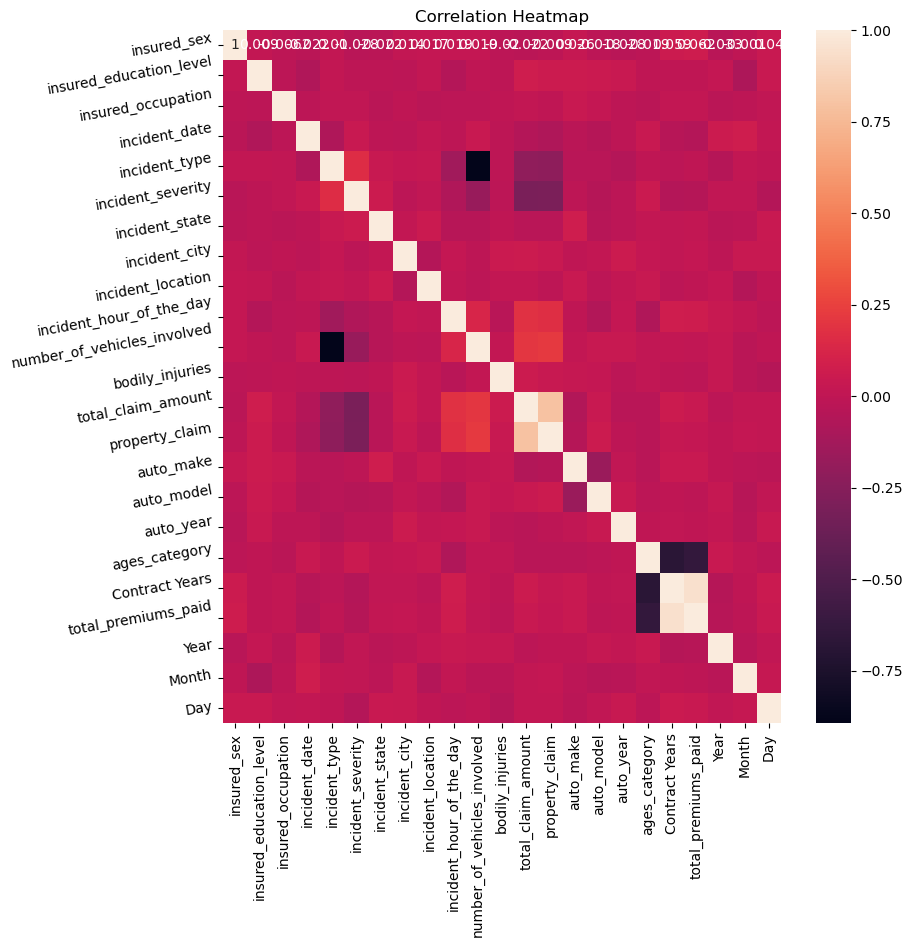

In [30]:
plt.figure(figsize=(9,9))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(df_encoded.corr(), annot=True, linecolor='white')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=10)           
plt.show()

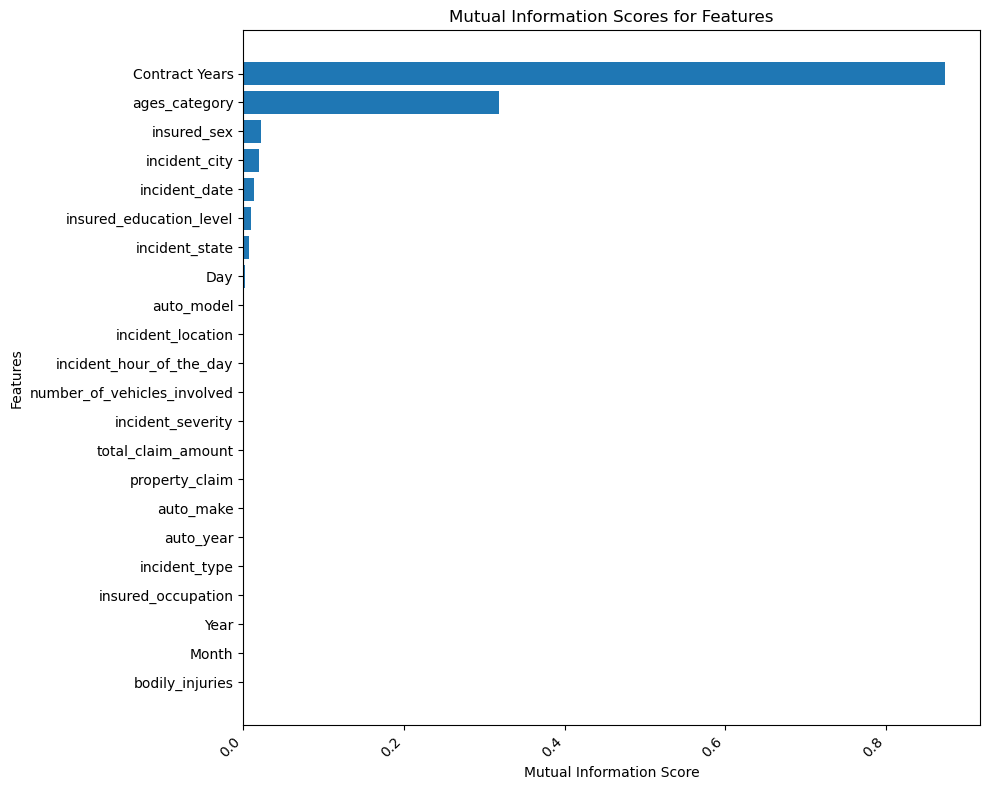

In [31]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

X = df_encoded.drop(columns='total_premiums_paid')
y = df_encoded[['total_premiums_paid']]

MI_score = mutual_info_regression(X, y)

score_df = pd.DataFrame({'X': X.columns, 'y': MI_score})

sorted_score_df = score_df.sort_values(by='y', ascending=False)

plt.figure(figsize=(10, 8))  

plt.barh(sorted_score_df['X'], sorted_score_df['y'])

# Invert the y-axis
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Features')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout() 
plt.show()

### 5. Data Modelling 


In [32]:
X=['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_date', 'incident_type', 'incident_severity', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'total_claim_amount',
       'property_claim', 'auto_make', 'auto_model', 'auto_year',
       'ages_category', 'Contract Years', 'total_premiums_paid', 'Year',
       'Month', 'Day']

In [33]:
from sklearn.preprocessing import StandardScaler

X=df_encoded.drop(columns='total_premiums_paid')
y=df_encoded[['total_premiums_paid']]
scale= StandardScaler()
X_scale= scale.fit_transform(X)


In [34]:
# split data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X_scale,y,test_size=0.2, random_state =42)

In [35]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
prediction1 = model_lr.predict(X_test)

In [36]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
prediction2 = model_RFR.predict(X_test)

In [37]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(random_state=2)
model_DTR.fit(X_train, y_train)
prediction3 = model_DTR.predict(X_test)

### 6. Model Performance 


In [38]:
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
def MSE(y_test, y_predict): 
 return metrics.mean_squared_error(y_test, y_predict)

In [40]:
print("Linear Regression: ", MSE(y_test, prediction1))
print("Random Forest: ", MSE(y_test, prediction2))
print("Decision Tree: ", MSE(y_test, prediction3))

Linear Regression:  7610.854350308614
Random Forest:  7011.514698999999
Decision Tree:  16095.07


In [41]:
def RMSE(y_test, y_predict):    
 return math.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [42]:
print("Random Forest:\t\t", RMSE(y_test, prediction2))
print("Linear Regression:\t", RMSE(y_test, prediction1))
print("Decision Tree: \t\t", RMSE(y_test, prediction3))

Random Forest:		 83.73478786621483
Linear Regression:	 87.2402106273742
Decision Tree: 		 126.86634699556853


In [43]:
print("Linear Regression:\t", round((r2_score(y_test, prediction1))*100),"%")
print("Random Forest:\t\t", round((r2_score(y_test, prediction2))*100),"%")
print("Decision Tree:\t\t", round((r2_score(y_test, prediction3))*100),"%")

Linear Regression:	 91 %
Random Forest:		 91 %
Decision Tree:		 80 %


### 7. Model Explanations 


In [46]:
df_new.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_date', 'incident_type', 'incident_severity', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'total_claim_amount',
       'property_claim', 'auto_make', 'auto_model', 'auto_year',
       'ages_category', 'Contract Years', 'total_premiums_paid', 'Year',
       'Month', 'Day'],
      dtype='object')

In [48]:
load = df_new[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_date', 'incident_type', 'incident_severity', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'total_claim_amount',
       'property_claim', 'auto_make', 'auto_model', 'auto_year',
       'ages_category', 'Contract Years', 'total_premiums_paid', 'Year',
       'Month', 'Day']]

load.to_csv('project.csv', index = False)
load

insured_sex insured_education_level insured_occupation incident_date  \
0          MALE                      MD       craft-repair    2015-01-25   
1          MALE                      MD  machine-op-inspct    2015-01-21   
2        FEMALE                     PhD              sales    2015-02-22   
3        FEMALE                     PhD       armed-forces    2015-01-10   
4          MALE               Associate              sales    2015-02-17   
..          ...                     ...                ...           ...   
995      FEMALE                 Masters       craft-repair    2015-02-22   
996      FEMALE                     PhD     prof-specialty    2015-01-24   
997      FEMALE                 Masters       armed-forces    2015-01-23   
998        MALE               Associate  handlers-cleaners    2015-02-26   
999      FEMALE               Associate              sales    2015-02-26   

                incident_type incident_severity incident_state incident_city  \
0    Single Vehicle Collision      Major Damage             SC      Columbus   
1               Vehicle Theft      Minor Damage             VA     Riverwood   
2     Multi-vehicle Collision      Minor Damage             NY      Columbus   
3    Single Vehicle Collision      Major Damage             OH     Arlington   
4               Vehicle Theft      Minor Damage             NY     Arlington   
..                        ...               ...            ...           ...   
995  Single Vehicle Collision      Minor Damage             NC    Northbrook   
996  Single Vehicle Collision      Major Damage             SC     Northbend   
997   Multi-vehicle Collision      Minor Damage             NC     Arlington   
998  Single Vehicle Collision      Major Damage             NY     Arlington   
999                Parked Car      Minor Damage             WV      Columbus   

       incident_location  incident_hour_of_the_day  ...  property_claim  \
0         9935 4th Drive                         5  ...           13020   
1           6608 MLK Hwy                         8  ...             780   
2      7121 Francis Lane                         7  ...            3850   
3       6956 Maple Drive                         5  ...            6340   
4           3041 3rd Ave                        20  ...             650   
..                   ...                       ...  ...             ...   
995   6045 Andromedia St                        20  ...            8720   
996     3092 Texas Drive                        23  ...           18080   
997          7629 5th St                         4  ...            7500   
998        6128 Elm Lane                         2  ...            5220   
999  1416 Cherokee Ridge                         6  ...             920   

      auto_make  auto_model  auto_year ages_category Contract Years  \
0          Saab         92x       2004   Middle Aged      27.333333   
1      Mercedes        E400       2007   Middle Aged      19.000000   
2         Dodge         RAM       2007   Young Adult      11.166667   
3     Chevrolet       Tahoe       2014   Middle Aged      21.333333   
4        Accura         RSX       2009   Middle Aged      19.000000   
..          ...         ...        ...           ...            ...   
995       Honda      Accord       2006   Middle Aged       0.250000   
996  Volkswagen      Passat       2015   Middle Aged      23.750000   
997      Suburu     Impreza       1996   Middle Aged      10.833333   
998        Audi          A5       1998       Elderly      38.166667   
999    Mercedes        E400       2007       Elderly      38.000000   

     total_premiums_paid  Year  Month  Day  
0                  38455  2014     10   17  
1                  22747  2006      6   27  
2                  15780  2000      9    6  
3                  30202  1990      5   25  
4                  30094  2014      6    6  
..                   ...   ...    ...  ...  
995                  327  1991      7   16  
996             